## **Bank Churn ANN Project Catalfio**

In [1]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
import warnings
warnings.filterwarnings("ignore")

### **Description**

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

**CustomerId:** Unique ID which is assigned to each customer

**Surname:** Last name of the customer 

**CreditScore**: It defines the credit history of the customer.  

**Geography**: A customer’s location    

**Gender**: It defines the Gender of the customer   

**Age**: Age of the customer     

**Tenure**: Number of years for which the customer has been with the bank

**NumOfProducts**: It refers to the number of products that a customer has purchased through the bank.

**Balance**: Account balance

**HasCrCard**: It is a categorical variable that decides whether the customer has a credit card or not.

**EstimatedSalary**: Estimated salary 

**isActiveMember**: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

**Exited**: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

### **Reading the Dataset and Feature Elimination**

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
pd.read_csv('/content/gdrive/MyDrive/bank.csv')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# import dataset "bank.csv"
data = pd.read_csv('/content/gdrive/MyDrive/bank.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# determining how many rows and columns in data

data.shape

(10000, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# determining the missing values found in each individual column

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# dropping RowNumber

data.drop(["RowNumber"], axis=1, inplace=True)

In [12]:
# dropping CustomerId

data.drop(["CustomerId"], axis=1, inplace=True)

In [13]:
# dropping Surname

data.drop(["Surname"], axis=1, inplace=True)

In [14]:
data.shape

(10000, 11)

In [15]:
data[data.duplicated()].count()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
#creating dummy variables for the categorical features
df1 = data
df1 = pd.get_dummies(df1,drop_first=True)
df1 = df1.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,0.0,0.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,1.0,0.0,1.0


In [17]:
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float32
 1   Age                10000 non-null  float32
 2   Tenure             10000 non-null  float32
 3   Balance            10000 non-null  float32
 4   NumOfProducts      10000 non-null  float32
 5   HasCrCard          10000 non-null  float32
 6   IsActiveMember     10000 non-null  float32
 7   EstimatedSalary    10000 non-null  float32
 8   Exited             10000 non-null  float32
 9   Geography_Germany  10000 non-null  float32
 10  Geography_Spain    10000 non-null  float32
 11  Gender_Male        10000 non-null  float32
dtypes: float32(12)
memory usage: 468.9 KB


**Analysis**



*   There are 10,000 rows and 14 columns in the dataset.
*   The dataset has interger, object and float data types.
*   No missing values found within dataset.
*   No duplicate data found within dataset.
*   Age, Tenure, and Estimate Salary are even distributed.  The mean and median are similar values.
*   Balance is left skewed.  Most likely because of 0 balance outliers.
*   We will not drop any outliers due to the outliers indicating the prediction we are trying to conclude.
*   Dropping the columns "RowNumber" and "CustomerID" as pandas indexing is appropriate.  These columns add no value to our model.
*   Dropping the column, "surname" as it knowing the customer's surname doesnt add any value to our model.



### **Perform an Exploratory Data Analysis on the data**

In [19]:
print(df1.Exited.mean())
print(df1.Exited.median())

0.2037000060081482
0.0


In [20]:
#Number of distinct categories or classes i.e., left bank or not
df1['Exited'].nunique()

2

Checking whether data is balanced

In [21]:
#checking the percentage of each class in the dataset
(df1.Exited.value_counts())/(df1.Exited.count())

0.0    0.7963
1.0    0.2037
Name: Exited, dtype: float64

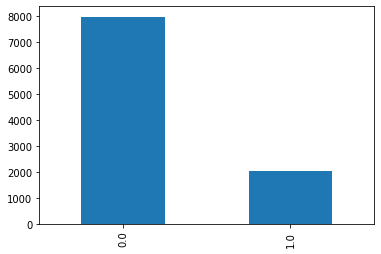

In [22]:
#visual representation of instances per class
%matplotlib inline
df1.Exited.value_counts().plot.bar()



*   80% of customers did not leave bank within 6 months.
*   20% of customers left bank within 6 months.



Bivariate Analysis

In [23]:
sns.pairplot(df1,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

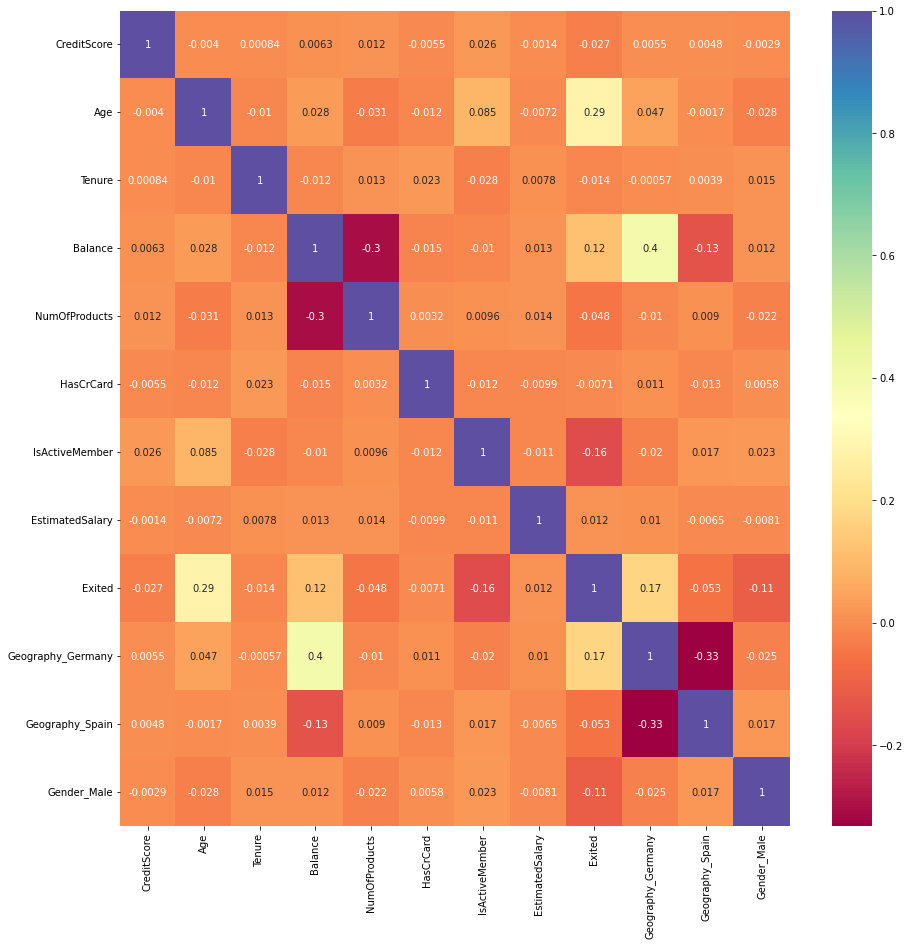

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(),cmap="Spectral",ax=ax,annot=True)

### **Illustrate the insights based on EDA**


*   Customers who stay with the bank past 6 months have larger balances by a considerable amount than customers who leave bank prior to 6 months.
*   Customers who have a better credit score tend to stick with the bank much more often than customers with not so great credit scores.
*   The target variable "Exited" has a positive correlation with the following features:  Age, Balance, Salary and Geography_Germany.  These columns will have a positive impact on if the cusotomer continues with bank past 6 months.
*   The target variable "Exited has a negative relationship with the following features:  CreditScore, Tenure, NumOfProducst, HasCrCard, IsActiveMember, EstimatedSalary, Geography_Spain, Gender_Male.
*   The strongest positive correlations between features is Balance and Geography_Germany followed by Exited and Age.  However, these correlations are both closer to 0 than to 1.
*   The strongest negative correlations between features is Geography_Germany and Geography_Spain followed by NumOfProducts and Balance. However, I would not consider these correaltion strong being .33 and .3 repectively.



### **Data Pre-processing**

In [25]:
#getting the features and labels and finally splitting the test and train data.

X = df1[['CreditScore','Age', 'Tenure', 'Balance',
     'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       ]]
Y = df1['Exited']



*   Seperating the features from labels




In [26]:
X_data = df1.iloc[:,0:29]
y_data = df1.iloc[:, -1]

In [27]:
#printing the shape of the data 
print(y_data.shape)
print(X_data.shape)

(10000,)
(10000, 12)




*   10,000 rows and 12 columns.



In [28]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)



*   Splitting the Dataset.



In [29]:
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# create target scaler object

target_scaler = preprocessing.MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
y_val=target_scaler.fit_transform(y_val.values.reshape(-1,1))



*   Normalizing the train and test set data separately.



In [30]:
#Printing the data after normalization
X_val

array([[1.        , 0.12162164, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.564     , 0.43243244, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.17799997, 0.24324325, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.15600002, 0.5945946 , 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.658     , 0.13513514, 0.90000004, ..., 0.        , 1.        ,
        0.        ],
       [0.65400004, 0.27027026, 0.4       , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)



*   New values after normalization.  Notice the data is now scaled from (-1, 1).



In [31]:
# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
X_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)
X_val1=tf.convert_to_tensor(X_val)
y_val1=tf.convert_to_tensor(y_val)



*   Converting the numpy array into tensors.



In [32]:
#printing the shape of training tensor
X_train1.shape[1]

11

**Model building**

In [33]:
input_dim = X_train1.shape[1]
output_dim = 1
learning_rate = 0.01

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))

def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions

def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error

# Let us now define a function to train the model. We will call the other functions in function definition.
def train(x, y,x1,y1):
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = compute_loss(y, predictions)
    
    dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here.
  weights.assign_sub(learning_rate * dloss_dw)
  bias.assign_sub(learning_rate * dloss_db)
  #calculating the validation loss
  predictions1 = predict(x1)
  v_loss = compute_loss(y1, predictions1)
  
  return loss,v_loss

In [34]:
training_loss=[]
val_loss=[]

for epoch in range(500):
  loss,v_loss = train(X_train1, y_train1,X_val1,y_val1)
  training_loss.append(loss)
  val_loss.append(v_loss)
  
  print('Epoch %d: Training Loss = %.4f, validation_loss= %.4f' % (epoch, float(loss),float(v_loss)))


print('Final Weights after 500 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 500 epochs:')
print('###############################################################################')
print(bias)

Epoch 0: Training Loss = 0.7981, validation_loss= 0.7132
Epoch 1: Training Loss = 0.7164, validation_loss= 0.6431
Epoch 2: Training Loss = 0.6454, validation_loss= 0.5821
Epoch 3: Training Loss = 0.5836, validation_loss= 0.5291
Epoch 4: Training Loss = 0.5298, validation_loss= 0.4829
Epoch 5: Training Loss = 0.4831, validation_loss= 0.4427
Epoch 6: Training Loss = 0.4424, validation_loss= 0.4077
Epoch 7: Training Loss = 0.4070, validation_loss= 0.3773
Epoch 8: Training Loss = 0.3762, validation_loss= 0.3508
Epoch 9: Training Loss = 0.3494, validation_loss= 0.3278
Epoch 10: Training Loss = 0.3261, validation_loss= 0.3077
Epoch 11: Training Loss = 0.3059, validation_loss= 0.2902
Epoch 12: Training Loss = 0.2882, validation_loss= 0.2750
Epoch 13: Training Loss = 0.2729, validation_loss= 0.2617
Epoch 14: Training Loss = 0.2595, validation_loss= 0.2502
Epoch 15: Training Loss = 0.2479, validation_loss= 0.2401
Epoch 16: Training Loss = 0.2378, validation_loss= 0.2313
Epoch 17: Training Loss 

As you can see, the loss is continuously decreasing which means model is learning

Let's plot the training and validation loss

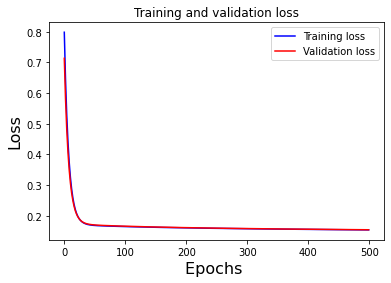

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(range(len(training_loss)), training_loss, 'b', label='Training loss') #plotting training loss
plt.plot(range(len(val_loss)), val_loss, 'r', label='Validation loss') # plotting validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

Above image shows plot of the training and validation loss. As you can see, lr model is not overfitting since validation and training loss is reducing gradually.

Let's us now test our model on the test data

In [36]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(0.1562914, shape=(), dtype=float32)


The testing loss is slightly higher than the training loss. Let's check the R square to understand how well the model has captured the variance of the dependent variable.


### **Deep neural network**

**Model-1**

*   We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as  Exited (0) or not Exited (1).
a dropout step is included to prevent overfitting.

**Dropout**

*   Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

#### **Keras Modelling**

Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

In [37]:
#initialize the model
model = Sequential()

In [38]:
# # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification Exited or not

*   Keras layers can be added to the model
*   It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

In [39]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

*   Keras model should be "compiled" prior to training

*   Types of loss (function) and optimizer should be designated

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,825
Trainable params: 1,825
Non-trainabl

In [41]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
342/342 [==============================] - 2s 5ms/step - loss: 0.4956 - accuracy: 0.7984 - val_loss: 0.4667 - val_accuracy: 0.7906
Epoch 2/10
342/342 [==============================] - 2s 4ms/step - loss: 0.4653 - accuracy: 0.8000 - val_loss: 0.4653 - val_accuracy: 0.7906
Epoch 3/10
342/342 [==============================] - 2s 5ms/step - loss: 0.4537 - accuracy: 0.8000 - val_loss: 0.4547 - val_accuracy: 0.7906
Epoch 4/10
342/342 [==============================] - 2s 4ms/step - loss: 0.4432 - accuracy: 0.8066 - val_loss: 0.4465 - val_accuracy: 0.8000
Epoch 5/10
342/342 [==============================] - 2s 5ms/step - loss: 0.4382 - accuracy: 0.8061 - val_loss: 0.4379 - val_accuracy: 0.8172
Epoch 6/10
342/342 [==============================] - 2s 5ms/step - loss: 0.4286 - accuracy: 0.8143 - val_loss: 0.4211 - val_accuracy: 0.8172
Epoch 7/10
342/342 [==============================] - 2s 4ms/step - loss: 0.4208 - accuracy: 0.8195 - val_loss: 0.4167 - val_accuracy: 0.8195
Epoch 

*   Training [Forward pass and Backpropagation]

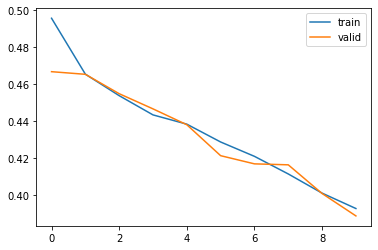

In [42]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [43]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8470


**Evaluation**

Keras model can be evaluated with evaluate()function

Evaluation results are contained in a list

*   The model achieves an accuracy rate of .847.  This is an average rate.  Let's see if we can improve with new models.

In [44]:
print(score)

[0.3740735948085785, 0.847000002861023]


In [45]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

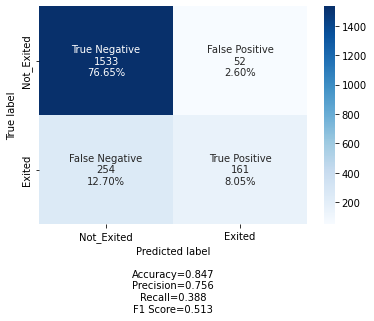

In [46]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

*   52 regular transactions are detected as potentially incorrect by the model. These are false positive. This number is negligible.

*   There are 254 False negatives.  This indicates too much loss for our model.

Conclusion:

*   We must find ways to further reduce the number of false negative.

### **Model Improvement - Let's try another architecture to get the better Recall**

**Early stopping:**

*   During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

*   This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

**Weight Initialization:**

*   Weight initialization is an important consideration in the design of a neural network model.

*   The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

*   Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

*   This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.

**There are many WI techniques as follows:**

1) Random normal initialization

2) Random Uniform initialization

3) Xaviour Initialization

4) He Initialization

In [47]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_dim = 11, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.1))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=157, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/157
8/8 [==============================] - 1s 27ms/step - loss: 1.4802 - accuracy: 0.2811 - val_loss: 0.7999 - val_accuracy: 0.4016
Epoch 2/157
8/8 [==============================] - 0s 9ms/step - loss: 0.8365 - accuracy: 0.5227 - val_loss: 0.5441 - val_accuracy: 0.7898
Epoch 3/157
8/8 [==============================] - 0s 7ms/step - loss: 0.6351 - accuracy: 0.7129 - val_loss: 0.5498 - val_accuracy: 0.7906
Epoch 4/157
8/8 [==============================] - 0s 8ms/step - loss: 0.5988 - accuracy: 0.7688 - val_loss: 0.5641 - val_accuracy: 0.7906
Epoch 5/157
8/8 [==============================] - 0s 7ms/step - loss: 0.5820 - accuracy: 0.7824 - val_loss: 0.5466 - val_accuracy: 0.7906
Epoch 6/157
8/8 [==============================] - 0s 9ms/step - loss: 0.5828 - accuracy: 0.7770 - val_loss: 0.5222 - val_accuracy: 0.7906
Epoch 7/157
8/8 [==============================] - 0s 8ms/step - loss: 0.5447 - accuracy: 0.7781 - val_loss: 0.5078 - val_accuracy: 0.7906
Epoch 8/157
8/8 [=========

*   Plotting the train and validation loss

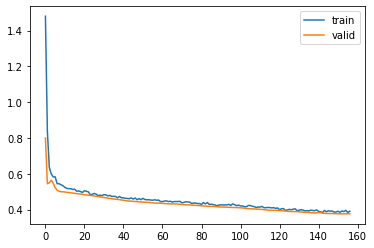

In [48]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

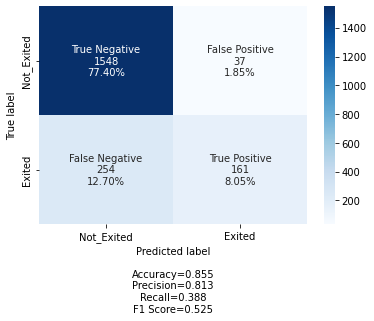

In [49]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

*   Plotting confusion matrix

#### **Conclusion:**

As you can see here the Recall of the model is not improved.  It is the same as the Previous ANN model.

Let's try weighted loss for imbalance dataset

### **Model Improvement - Weighted loss to account for large class imbalance in train dataset**

*   we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection.
*   We will use our first ANN model and apply weighted loss

In [50]:
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight

In [51]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train[:,0])
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6264682850430697, 1: 2.476780185758514}

*   The class 'Exited' (y=1) is assigned a weight of 2.476 vs 0.62 for the class 'not Exited' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent cases during training.

In [52]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)


Epoch 1/5
427/427 [==============================] - 2s 5ms/step - loss: 0.5393 - accuracy: 0.7350
Epoch 2/5
427/427 [==============================] - 2s 5ms/step - loss: 0.5145 - accuracy: 0.7409
Epoch 3/5
427/427 [==============================] - 2s 5ms/step - loss: 0.5118 - accuracy: 0.7358
Epoch 4/5
427/427 [==============================] - 2s 5ms/step - loss: 0.5033 - accuracy: 0.7453
Epoch 5/5
427/427 [==============================] - 2s 5ms/step - loss: 0.4993 - accuracy: 0.7577


In [53]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7355


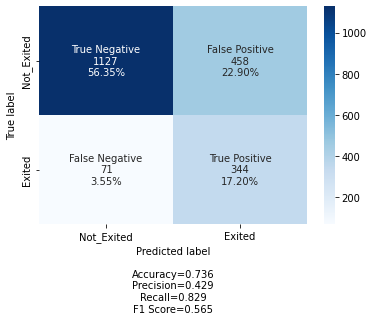

In [54]:
#Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Conclusion:**

As you can see here, the Recall is increased but the precision is very bad. 

There is still lot of scope of improvements as follows:

1) Threshold can be tuned to get the optimal value

2) Resampling techniques can be applied to balanced the data and then train the model

3) Hyperparameter tuning can be applied to tune the different Hyperparameters


### **Model Performance Evaluation**

**Model:**

*   We will use a simple NN made of 5 fully-connected layers with ReLu activation. 
*   The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. 
*   For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as Exited (0) or not Exited (1). 
*   A dropout step is included to prevent overfitting.
*   The recall score is low at .388.
*   Accuracy score is ok at .847
*   Precision score is ok at .756.


**Model-2:**

*   Early Stopping:  During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.
*   I tried multiple learning rates including, but not limited to, .01, .1, .05, .001 and settles on .001.
*   I settled on 157 epochs as that is when the loss function stopped declining.  It even started progressing as the epochs stretched closer to 200.
*   From a few epochs up to 157, the recall score would increase gradually as would precision and accuracy.
*   Accuracy with a rate of .855 and Precision with a rate of .813 are decent scores.
*   Our F1 score remains low due to the low recall score.  I


**Weighted Model**

*   Weight initialization is an important consideration in the design of a neural network model.
*   The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.
*   Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.
*   Most noteably, our recall score has greatly increased using the weighted model to .829.
*   The weighted model also offers the best F1 score but by a small margin.
*   Accuracy of the weighted model has also decreased by a small margin.
*   Precision has seen drastic change, much like recall, but in the opposite direction.  The weighted model has by far the lowest precision score at .429.


###  **Conclusion and key takeaways**

*   Since the weighted model provides the least false negatives by a large amount, I would choose this as our final model.
*   As you can see here the Recall is increased but the precision is very bad. There is still lot of scope of improvements as follows:
*   Threshold can be tuned to get the optimal value
*   Resampling techniques can be applied to balanced the data and then train the model
*   Hyperparameter tuning can be applied to tune the different Hyperparameters



#####  *Created by Stephen Catalfio*